In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = pd.read_excel('Real estate valuation data set.xlsx')
data.shape

(414, 8)

In [3]:
data.head(10)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.666667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.666667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.416667,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500000,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.416667,17.9,1783.18000,3,24.96731,121.51486,22.1


Text(0, 0.5, 'Price [dollars/$m^2$]')

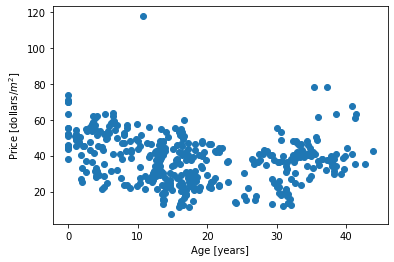

In [4]:
# Graficando las variables de interes
plt.scatter(data['X2 house age'], data['Y house price of unit area'])
plt.xlabel('Age [years]')
plt.ylabel('Price [dollars/$m^2$]')

In [5]:
%%capture
pip install ipywidgets

In [31]:
def ECM (theta,x,y, alpha):
    m = len(x)
    theta0, theta1 = theta
    h0 = theta0 + theta1 * x
    
    jtheta = (1/m)* np.sum((h0)-y)
    
    theta0 = ((1/m)* np.sum((h0)-y) ) * alpha
    theta1 = ((1/m)* np.sum(((h0)-y)* x))* alpha
    theta = (theta0,theta1)
    return jtheta,theta
    

In [71]:
%%capture

pip install ipywidgets


In [72]:
from ipywidgets import interact
def alpha0(x):
    return x

In [75]:
alpha =interact(alpha, x=(0.0,1.0,0.01));

interactive(children=(FloatSlider(value=0.5, description='x', max=1.0, step=0.01), Output()), _dom_classes=('w…

In [42]:
x = data['X2 house age']
y = data['Y house price of unit area']



# primero vamos a normalizar las entradas
x = (x - np.min(x))/((np.max(x)-np.min (x)))


# variables iniciales

N0 = 10
alpha = [1,0.75,0.5,0.125,0.01,0.001]

theta = (0,1)


errores_set = []
iteraciones_set =[]
for j in alpha:
    errores_set.append(errores)
    errores = []
    iteraciones_set.append(iteraciones)
    iteraciones =[]

    for i in range(N0):

       

        error,theta = ECM(theta,x,y,j)
        errores.append(error)
        iteraciones.append(i+1)
        


## recordar que este no es el error, mi variable error reaalmente esta guardando el minimo
## de la función, he encontrado a los thetas que minimizan mi función de error.

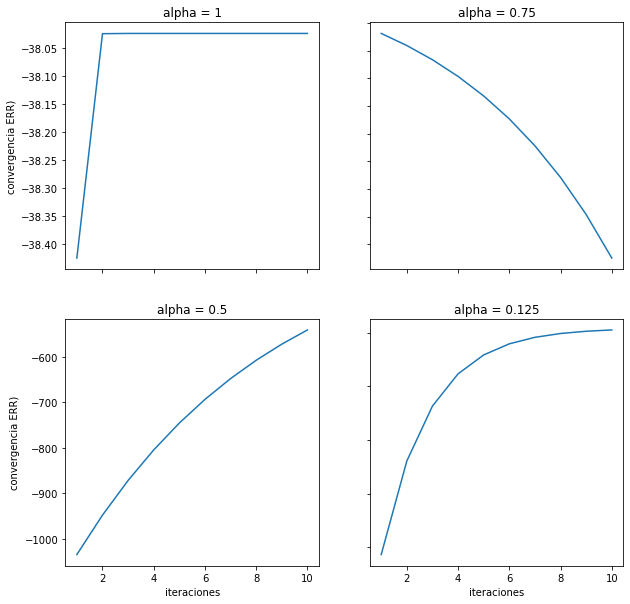

In [56]:
fig, axs = plt.subplots(2, 2,figsize=(10,10))
axs[0, 0].plot(iteraciones_set[0],errores_set[0])
axs[0, 0].set_title('alpha = '+ str(alpha[0]))


axs[0, 1].plot(iteraciones_set[1],errores_set[1])
axs[0, 1].set_title('alpha = '+ str(alpha[1]))


axs[1, 0].plot(iteraciones_set[2],errores_set[2])
axs[1, 0].set_title('alpha = '+ str(alpha[2]))


axs[1, 1].plot(iteraciones_set[3],errores_set[3])
axs[1, 1].set_title('alpha = '+ str(alpha[3]))

for ax in axs.flat:
    ax.set(xlabel='iteraciones', ylabel='convergencia ERR)')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [58]:
# sin normalizar x


x = data['X2 house age']
y = data['Y house price of unit area']




# variables iniciales

N0 = 10
alpha = [1,0.75,0.5,0.125,0.01,0.001]

theta = (0,1)


errores_set = []
iteraciones_set =[]
for j in alpha:
    errores_set.append(errores)
    errores = []
    iteraciones_set.append(iteraciones)
    iteraciones =[]

    for i in range(N0):

       

        error,theta = ECM(theta,x,y,j)
        errores.append(error)
        iteraciones.append(i+1)

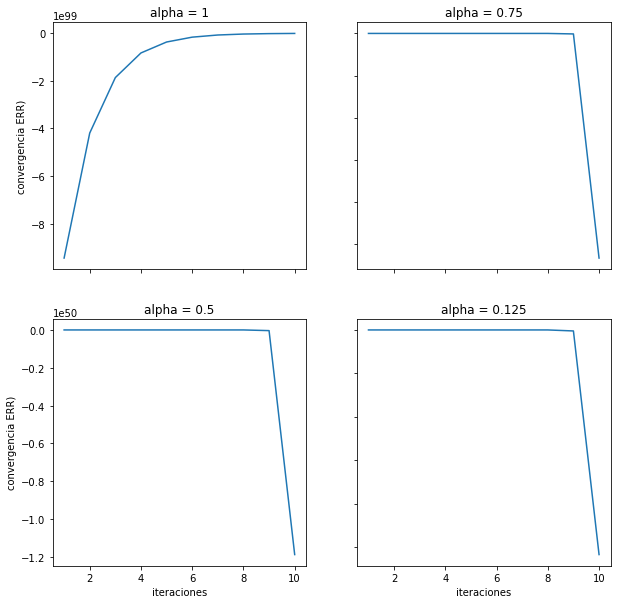

In [59]:
fig, axs = plt.subplots(2, 2,figsize=(10,10))
axs[0, 0].plot(iteraciones_set[0],errores_set[0])
axs[0, 0].set_title('alpha = '+ str(alpha[0]))


axs[0, 1].plot(iteraciones_set[1],errores_set[1])
axs[0, 1].set_title('alpha = '+ str(alpha[1]))


axs[1, 0].plot(iteraciones_set[2],errores_set[2])
axs[1, 0].set_title('alpha = '+ str(alpha[2]))


axs[1, 1].plot(iteraciones_set[3],errores_set[3])
axs[1, 1].set_title('alpha = '+ str(alpha[3]))

for ax in axs.flat:
    ax.set(xlabel='iteraciones', ylabel='convergencia ERR)')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [76]:
data.head(5)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


# Multivariable



In [ ]:
def ECM_multi (theta,x,y, alpha):
    m = len(x)
    ho = theta[0]
    for i in range(1,len(theta)):
        h0 =theta[i] + h0
    theta0, theta1 = theta
    h0 = theta0 + theta1 * x
    
    jtheta = (1/m)* np.sum((h0)-y)
    
    theta0 = ((1/m)* np.sum((h0)-y) ) * alpha
    theta1 = ((1/m)* np.sum(((h0)-y)* x))* alpha
    theta = (theta0,theta1)
    return jtheta,theta
    

In [79]:
x = data['X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores']
x

KeyError: ('X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores')

In [ ]:

x = data['X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores']
y = data['Y house price of unit area']


# variables iniciales

N0 = 10
alpha = [1,0.75,0.5,0.125,0.01,0.001]

theta = (0,0,0,1)



errores_set = []
iteraciones_set =[]
for j in alpha:
    errores_set.append(errores)
    errores = []
    iteraciones_set.append(iteraciones)
    iteraciones =[]

    for i in range(N0):

       

        error,theta = ECM_multi(theta,x,y,j)
        errores.append(error)
        iteraciones.append(i+1)
